In [ ]:
a) Simulate flipping a coin N times.

Hint. Draw N random integers 0 and 1 using numpy.random.randint.



In [7]:
import random

def flipping_coin(N):
    heads=0
    tails=0
    
    for i in range(N):
        result=random.randint(0,1)
        
        if result==0:
            tails+=1
            
        else:
            heads+=1
            
    return heads/N, tails/N
            
            
    
    
#just typing print format here for reference: print("probability of getting heads is {}".format(heads/N))   

In [8]:
flipping_coin(1000)

(0.503, 0.497)

In [4]:
import numpy as np

N = 10
flips = np.random.randint(2, size=N)

In [5]:
flips

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
for N1 in (10, 30, 100, 500):
    print(N1)

10
30
100
500


In [ ]:
We can solve these two questions together in the cell below:

b) Look at a subset N1≤N of the experiments in a) and compute the probability of getting a head 
(M1/N1, where M1 is the number of heads in N1 experiments). Choose N=1000 and print out the probability for 
N1=10,100,500,1000. Generate just N numbers once in the program. How do you think the accuracy of the computed 
probability vary with N1? Is the output compatible with this expectation?


c) Now we want to study the probability of getting a head, p, as a function of N1, i.e., for N1=1,…,N. A first try to 
compute the probability array for p is



In [18]:
import numpy as np
def flip_coin_prob(N):
    flips=np.random.randint(2, size=N)
    
    for N1 in (10, 100, 500, 1000):
        print("Sample N1 is {}, Prob. of heads is {}".format(N1, np.sum(flips[:N1]) / float(N1)))
        
    
#here np.sum(flips[:N1]) 

In [19]:
flip_coin_prob(10000)

Sample N1 is 10, Prob. of heads is 0.5
Sample N1 is 100, Prob. of heads is 0.58
Sample N1 is 500, Prob. of heads is 0.514
Sample N1 is 1000, Prob. of heads is 0.491


In [ ]:
#refer: http://hplgit.github.io/primer.html/doc/pub/random/._random-solarized008.html
#refer: https://github.com/noahwaterfieldprice/python_primer/blob/master/ch_8/flip_coin_prob_developm.py

Implement these computations in a function.

d) An array q[i] = np.sum(h([:i])) reflects a cumulative sum and can be efficiently generated by np.cumsum: 
q = np.cumsum(h). Thereafter we can compute p by q/I, where I[i]=i+1 and I can be computed by 
np.arange(1,N+1) or r_[1:N+1] (integers 1, 2, …, up to but not including N+1). 
Use cumsum to make an alternative vectorized version of the function in c).

e) Write a test function that verifies that the implementations in c) and d) give the same results.

Hint. Use numpy.allclose to compare two arrays.

f) Make a function that applies the time module to measure the relative efficiency of the implementations in c) and d).

g) Plot p against I for the case where N=10000. Annotate the axis and the plot with relevant text.




In [20]:
#Let's answer all the questions from d to g here and in the cells below

import numpy as np
import matplotlib.pyplot as plt


N = 10000
flips = np.random.randint(2, size=N)

# scalar version
p_scalar = np.zeros(N)
for i in range(N):
    p_scalar[i] = np.sum(flips[:i + 1]) / float(i + 1)
    
    

In [25]:
p_scalar

array([1.        , 0.5       , 0.33333333, ..., 0.49529906, 0.49524952,
       0.4953    ])

In [21]:
# vectorised version
#Why do we care about cumulative sum up until an index? Well if you think about it that's actually what we do when we 
#calculate probability of events, meaning: I have tossed a coin 10 times. If I need a probability for all the 10 events I
#sum all the occurrences of events and divide that by total number of events. But if I need to calculate the probability
#value at a point then I sum the values up until that point and divide by the number of events up until that point. So
#at say 3rd toss we find the cumulative sum up until the 3rd point and divide the sum by the number of events that have 
#happened up until the 3rd point which is 3

I = np.arange(1, N + 1, dtype=float)
q = np.cumsum(flips)
p_vec = q / I

In [22]:
I

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.998e+03, 9.999e+03,
       1.000e+04])

In [23]:
q

array([   1,    1,    1, ..., 4952, 4952, 4953])

In [24]:
p_vec

array([1.        , 0.5       , 0.33333333, ..., 0.49529906, 0.49524952,
       0.4953    ])

In [26]:
#we can compare two arrays using np.allclose

print(np.allclose(p_scalar, p_vec))

True


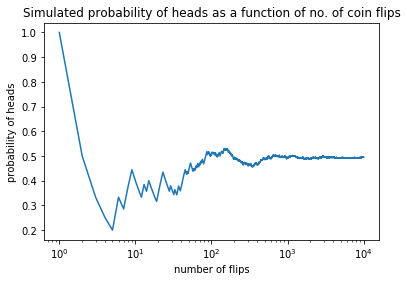

In [27]:
plt.plot(I, p_vec)
plt.xlabel('number of flips')
plt.ylabel('probability of heads')
plt.title('Simulated probability of heads as a function of no. of coin flips')
plt.xscale('log')
plt.show()